In [31]:
#Initial Imports

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [2]:
#Whale Returns 

whale_returns_csv = Path("whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
#count nulls

print(whale_returns.isnull().sum())

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [4]:
#remove nulls

whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
#algorithmic daily returns

algo_returns_csv = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [6]:
#count the nulls

algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
#remove the nulls

algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [8]:
#S&P500 Returns

sp500_history_csv = Path("sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
#Check data type

sp500_history.dtypes

Close    object
dtype: object

In [10]:
#Fix Data type

sp500_history["Close"] = sp500_history["Close"].str.replace("$","")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

<ipython-input-10-5e60d10ac26e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history["Close"] = sp500_history["Close"].str.replace("$","")


Close    float64
dtype: object

In [11]:
#Calculate Daily Returns

sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
#Drop the nulls

sp500_returns.dropna().head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
#Rename Columns

sp500_returns.rename(columns={"Close": "S&P 500"}, inplace=True)
sp500_returns.head()

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
#join whale, algorithmic & s&P500 return into a dataframe with columns for each portfolio return
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

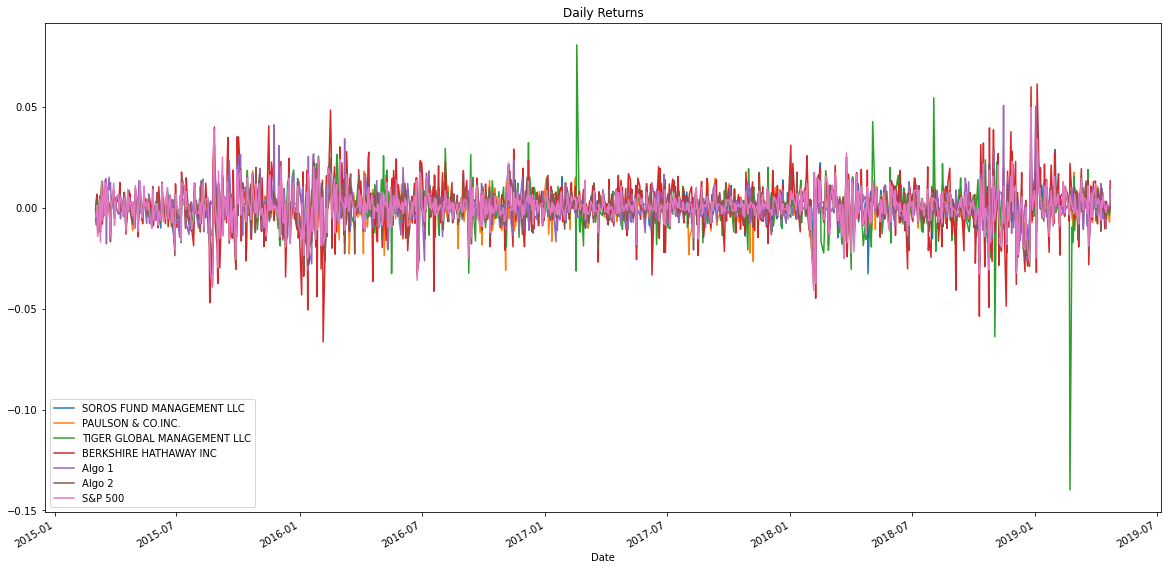

In [15]:
# Plot daily returns

combined_returns.plot(title="Daily Returns", figsize=(20,10))

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

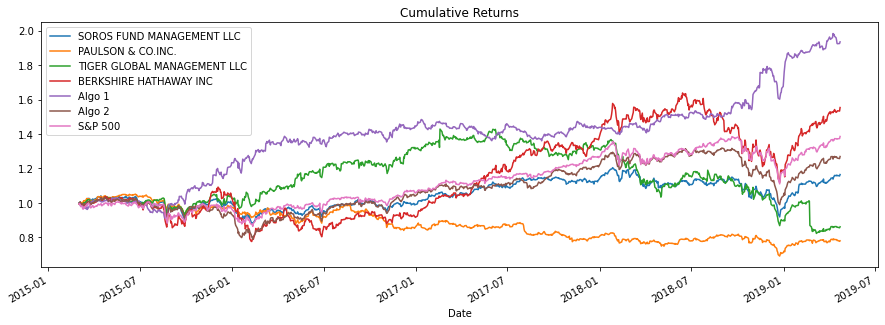

In [16]:
# Plot cumulative returns

cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.plot(title="Cumulative Returns", figsize=(15,5))

Text(0.5, 1.0, 'Portfolio Risk')

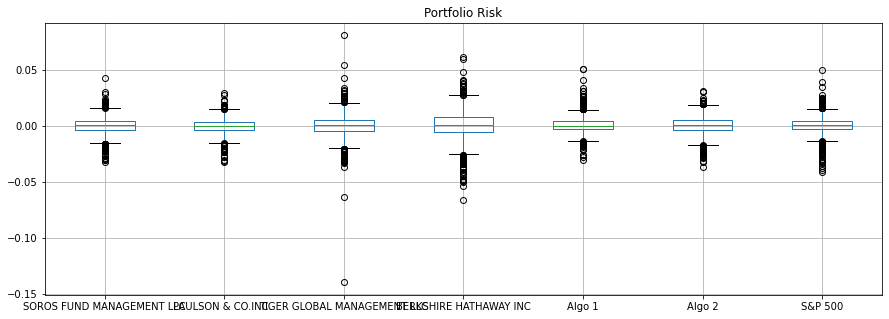

In [26]:
# Box plot to visually show risk

combined_returns.boxplot(figsize=(15,5)).set_title("Portfolio Risk")

In [27]:
#Calculate daily standard dev. of s&p500

combined_daily_std = combined_returns.std()
combined_daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [20]:
#Det. which portfolios are riskier than the s&p500
From the figures above the portfolios of TGM LLC and BHI are risker as they each respectfully have standard deviations of .010984 & .012919 as compared to the s&p500 which has a standard deviation of .008554.

NameError: name 'combined_df' is not defined

In [28]:
#calculate annualized standard deviation (252 trading days)

annualized_combined_std = combined_daily_std * np.sqrt(252)
annualized_combined_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

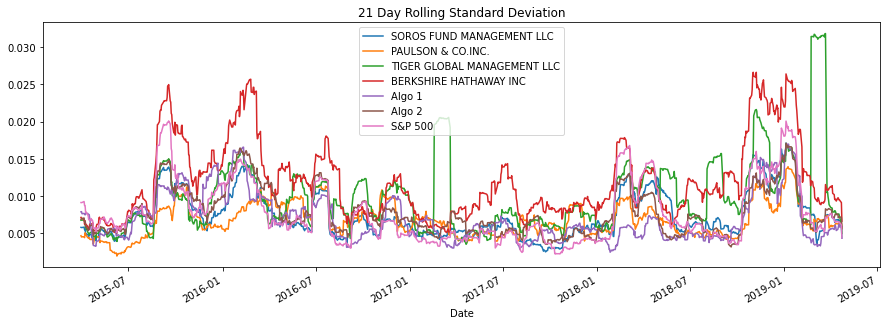

In [34]:
#calculate and plot rolling standard deviation for the s&p500 using a 21 day window

combined_returns.rolling(window=21).std().plot(figsize=(15,5), title="21 Day Rolling Standard Deviation")

In [37]:
#calculate correlation

correlation = combined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

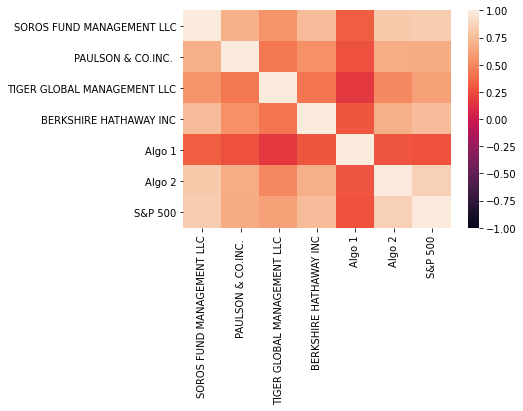

In [38]:
#calculate correlation & display correlation matrix

sns.heatmap(correlation,  vmin=-1, vmax=1,)

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC BETA'}, xlabel='Date'>

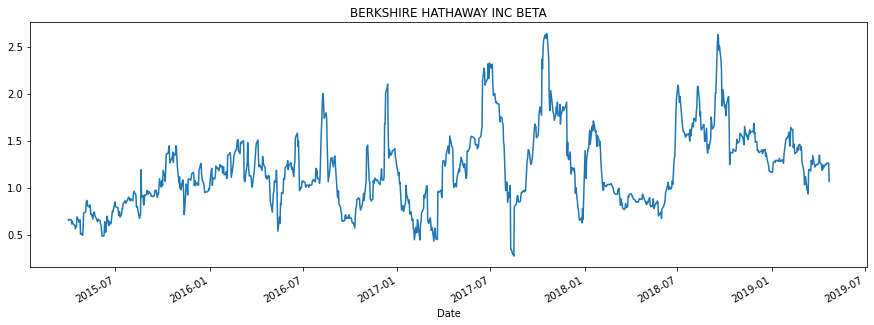

In [22]:
#calculate Beta for a single portfolio, variance of s&p500, compute Beta and plot Beta trend

rolling_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_returns['S&P 500'])
rolling_variance = combined_returns['S&P 500'].rolling(window=21).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(15,5), title="BERKSHIRE HATHAWAY INC BETA")

<AxesSubplot:title={'center':'EXPONENTIAL WTG AVG'}, xlabel='Date'>

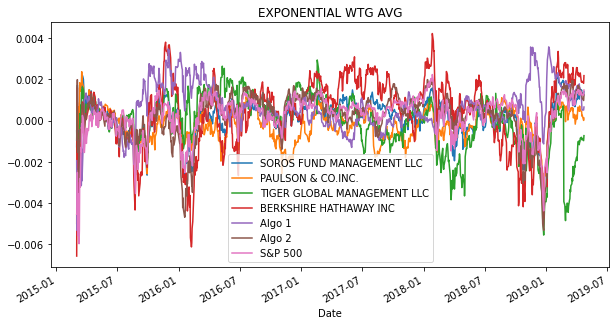

In [23]:
#ise EMW to calculate rolling window

expo_rolling_window = combined_returns.ewm(halflife=21).mean()
expo_rolling_window.plot(figsize=(10,5), title="EXPONENTIAL WTG AVG")

<AxesSubplot:title={'center':'Sharpe Ratios'}>

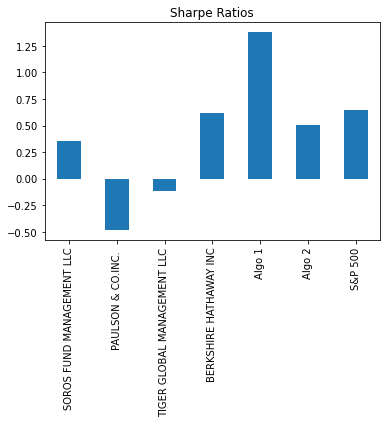

In [24]:
#annualizes sharpe ratio and visualize bar plot

sharpe_ratios = (combined_returns.mean()*252) /(combined_returns.std()*np.sqrt(252))
sharpe_ratios

sharpe_ratios.plot(kind ='bar', title ='Sharpe Ratios')

In [ ]:
Algo 1 outperforms both the Whales portfolios and market S&P500